In [ ]:
from collections import defaultdict
def invert_dict(original_dict):
    inverted_dict = defaultdict(list)

    for key, values in original_dict.items():
        for value in values:
            inverted_dict[string_convert(value)].append(key)  # Swap key and value

    return dict(inverted_dict) 

keggs = gp.get_library(name='KEGG_2021_Human',organism='human')
kegg_features = invert_dict(keggs)
# Save dictionary to a Pickle file
with open("/itf-fi-ml/shared/users/ziyuzh/svm/data/kegg/kegg_features.pkl", "wb") as f:
    pickle.dump(kegg_features, f)

In [ ]:
# Read dictionary from a Pickle file
with open("/itf-fi-ml/shared/users/ziyuzh/svm/data/kegg/kegg_features.pkl", "rb") as f:
    kegg_features = pickle.load(f)

In [ ]:
def merge_values(query_dict):
    all_items = []
    for key in query_dict:
        all_items.extend(query_dict[key])
    return all_items

def sparsity(query_dict):
    items = merge_values(query_dict)
    return 1-(len(items)/(len(query_dict)*len(set(items))))

print(sparsity(kegg_features))

In [ ]:
from itertools import combinations

def unique_pairs(items):
    return list(combinations(set(items), 2))

def jaccard_similarity(set1, set2):
    intersection = len(set1.intersection(set2))
    union = len(set1.union(set2))
    return intersection / union if union != 0 else 0

def feature_similarity(gene1,gene2,query_dict):
    jaccard_score = jaccard_similarity(set(query_dict[gene1]), set(query_dict[gene2]))
    return jaccard_score

def pair_similarity(query_dict):
    pairs = unique_pairs(list(query_dict.keys()))
    score_dict = dict()
    for pair in pairs:
        score = feature_similarity(pair[0],pair[1],query_dict)
        score_dict[pair] = score
    return score_dict


In [ ]:
kegg_dict = pair_similarity(kegg_features)
print(1 - (list(kegg_dict.values()).count(0)/len(kegg_dict)))
# Save dictionary to a Pickle file
with open("/itf-fi-ml/shared/users/ziyuzh/svm/data/kegg/kegg_sim.pkl", "wb") as f:
    pickle.dump(kegg_dict, f)

In [1]:
import pickle

In [2]:
with open("/itf-fi-ml/shared/users/ziyuzh/svm/data/kegg/kegg_sim.pkl", "rb") as f:
    kegg_features = pickle.load(f)

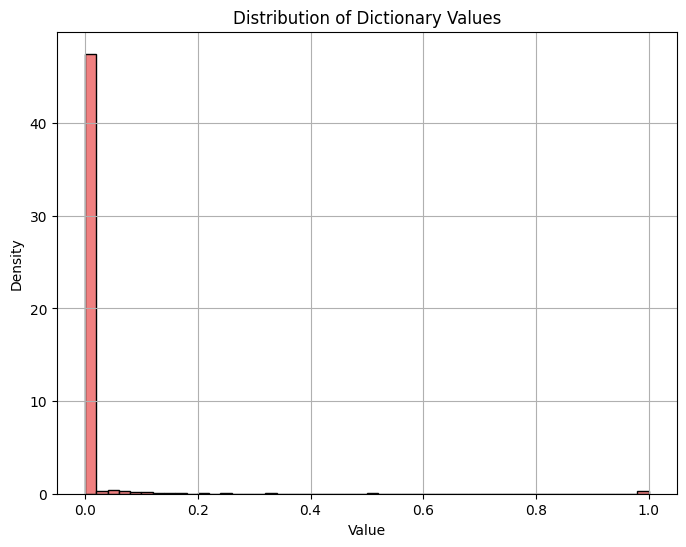

In [ ]:


import matplotlib.pyplot as plt


# Extract values
values = list(kegg_features.values())

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(values, bins=50, color='lightcoral', edgecolor='black', density=True)
plt.title('Distribution of Dictionary Values')
plt.xlabel('Value')
plt.ylabel('Density')

plt.grid(True)
plt.show()


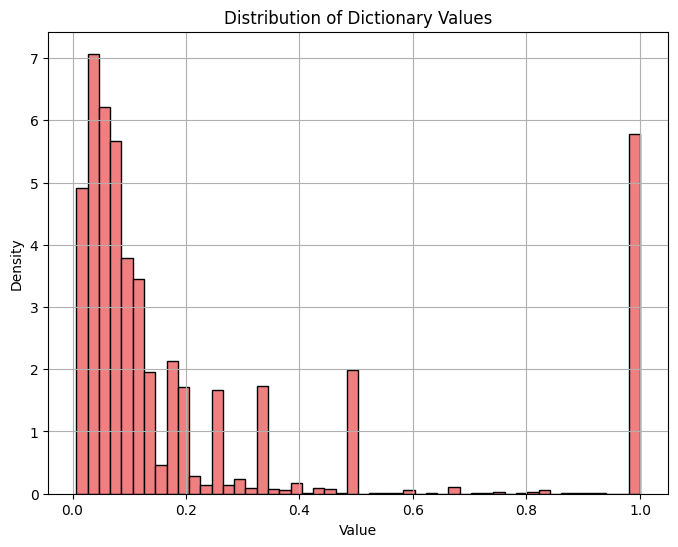

In [6]:
non_0_values = [x for x in values if x != 0]
# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(non_0_values, bins=50, color='lightcoral', edgecolor='black', density=True)
plt.title('Distribution of Dictionary Values')
plt.xlabel('Value')
plt.ylabel('Density')

plt.grid(True)
plt.show()

In [7]:
with open("/itf-fi-ml/shared/users/ziyuzh/svm/data/kegg/kegg_features.pkl", "rb") as f:
    kegg_features = pickle.load(f)